**EDA and Preprocessing**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


import warnings
warnings.filterwarnings('ignore')

**1) Missing value**

**Dropping missing values**

In [ ]:
np.nan

nan

In [ ]:
name = ["john","jack","jill","kenny","kevin"]
math = [89,78,67,np.nan,85]
science = [78,75,np.nan,np.nan,76]

In [ ]:
dic = {"name":name,"math":math,"science":science}
print(dic)

{'name': ['john', 'jack', 'jill', 'kenny', 'kevin'], 'math': [89, 78, 67, nan, 85], 'science': [78, 75, nan, nan, 76]}


In [ ]:
df = pd.DataFrame(dic)

In [ ]:
df.head()

,name,math,science
0,john,89.0,78.0
1,jack,78.0,75.0
2,jill,67.0,NaN
3,kenny,NaN,NaN
4,kevin,85.0,76.0


In [ ]:
df.isnull().sum()

name       0
math       1
science    2
dtype: int64

In [ ]:
df.dropna()

,name,math,science
0,john,89.0,78.0
1,jack,78.0,75.0
4,kevin,85.0,76.0


In [ ]:
df.head()

,name,math,science
0,john,89.0,78.0
1,jack,78.0,75.0
2,jill,67.0,NaN
3,kenny,NaN,NaN
4,kevin,85.0,76.0


In [ ]:
df.drop([3,2]) #it drops 3nd row and 2nd row.

,name,math,science
0,john,89.0,78.0
1,jack,78.0,75.0
4,kevin,85.0,76.0


In [ ]:
df.drop(["math","science"],axis=1)

,name
0,john
1,jack
2,jill
3,kenny
4,kevin


**Replacing missing values**

In [ ]:
df.head()

,name,math,science
0,john,89.0,78.0
1,jack,78.0,75.0
2,jill,67.0,NaN
3,kenny,NaN,NaN
4,kevin,85.0,76.0


In [ ]:
df.fillna(0)

,name,math,science
0,john,89.0,78.0
1,jack,78.0,75.0
2,jill,67.0,0.0
3,kenny,0.0,0.0
4,kevin,85.0,76.0


In [ ]:
math_mean = df["math"].mean()
science_mean = df["science"].mean()
print(math_mean)
print(science_mean)

79.75
76.33333333333333


In [ ]:
df["math"].fillna(math_mean,inplace=True)

In [ ]:
df["science"].fillna(science_mean,inplace=True)

In [ ]:
df.head()

,name,math,science
0,john,89.00,78.000000
1,jack,78.00,75.000000
2,jill,67.00,76.333333
3,kenny,79.75,76.333333
4,kevin,85.00,76.000000


In [2]:
df = pd.read_csv("/content/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
df["Fare"].value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: Fare, Length: 248, dtype: int64

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.fillna(method="ffill",inplace=True)

In [14]:
df["Embarked"].value_counts()

S    644
C    169
Q     78
Name: Embarked, dtype: int64

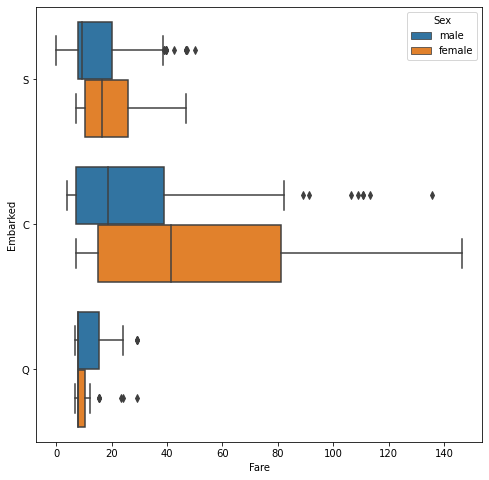

In [93]:
plt.figure(figsize=(8,8))
sns.boxplot(data=df,x=df["Fare"],y=df["Embarked"],hue="Sex")
plt.show()

In [33]:
df.shape

(891, 12)

In [67]:
s_outliers=df[(df["Embarked"]=="S") & (df["Fare"]>50)].index

In [60]:
c_outliers=df[(df["Embarked"]=="C") & (df["Fare"]>200)].index

In [64]:
q_outliers=df[(df["Embarked"]=="Q") & (df["Fare"]>76)].index

In [68]:
df.drop(s_outliers,inplace=True)

In [61]:
df.drop(c_outliers,inplace=True)

In [65]:
df.drop(q_outliers,inplace=True)

In [70]:
df.shape

(781, 12)

In [71]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C85,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,C123,S
5,6,0,3,"Moran, Mr. James",male,35.0,0,0,330877,8.4583,C123,Q


In [72]:
max_limit = df.Fare.mean()+ 3*df.Fare.std()
min_limit = df.Fare.mean()- 3*df.Fare.std()
max_limit,min_limit

(85.2680334346511, -44.645094126072365)

In [75]:
df[(df.Fare>max_limit) | (df.Fare<min_limit)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,40.00,1,0,PC 17569,146.5208,B78,C
195,196,1,1,"Lurette, Miss. Elise",female,58.00,0,0,PC 17569,146.5208,B80,C
215,216,1,1,"Newell, Miss. Madeleine",female,31.00,1,0,35273,113.2750,D36,C
291,292,1,1,"Bishop, Mrs. Dickinson H (Helen Walton)",female,19.00,1,0,11967,91.0792,B49,C
306,307,1,1,"Fleming, Miss. Margaret",female,0.92,0,0,17421,110.8833,C22 C26,C
307,308,1,1,"Penasco y Castellana, Mrs. Victor de Satode (M...",female,17.00,1,0,PC 17758,108.9000,C65,C
319,320,1,1,"Spedden, Mrs. Frederic Oakley (Margaretta Corn...",female,40.00,1,1,16966,134.5000,E34,C
325,326,1,1,"Young, Miss. Marie Grice",female,36.00,0,0,PC 17760,135.6333,C32,C
337,338,1,1,"Burns, Miss. Elizabeth Margaret",female,41.00,0,0,16966,134.5000,E40,C
373,374,0,1,"Ringhini, Mr. Sante",male,22.00,0,0,PC 17760,135.6333,E50,C


removing outliers using iqr

In [83]:
q1,q3 = np.percentile(df.Fare,[25,75])

In [84]:
iqr = q3-q1
print(iqr)

18.1042


In [86]:
upper_limit = q3+1.5*iqr
lower_limit = q1-1.5*iqr

In [ ]:
outliers = df[(df.Fare>upper_limit) | (df.Fare<lower_limit)]
outliers.head()

In [ ]:
for i  in outliers.values:
  print(i)

In [99]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C85,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,C123,S
5,6,0,3,"Moran, Mr. James",male,35.0,0,0,330877,8.4583,C123,Q


In [101]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#handling categorical data

In [ ]:
#one hot encoding
#label encoding

In [102]:
cat_df=df.select_dtypes(object)
num_df=df.select_dtypes(["int","float"])

In [103]:
cat_df.head()

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,C85,S
4,"Allen, Mr. William Henry",male,373450,C123,S
5,"Moran, Mr. James",male,330877,C123,Q


In [104]:
num_df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
4,5,0,3,35.0,0,0,8.0500
5,6,0,3,35.0,0,0,8.4583
